In [1]:
import os
import numpy as np
import pandas as pd
from scipy import optimize
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D 
%matplotlib inline


In [2]:
 data=pd.read_csv(os.path.join('Data', 'house_data_complete.csv'))

In [3]:
datacopy=np.array(data)
datacopy
Xtrain, ytrain= datacopy[0:17290, 3:11], datacopy[0:17290, 2]  
Xcross, ycross=datacopy[17291:19452, 3:11], datacopy[17291:19452, 2]
Xtest, ytest=datacopy[19453: 21614, 3:11], datacopy[19453:21614, 2]
Xtrain2= datacopy[0:17290, 3:11]
Xtrain2=np.concatenate([Xtrain2, np.power(Xtrain2[:, 2], 2)[:, None]], axis=1)
Xcross2=Xcross
Xcross2=np.concatenate([Xcross2, np.power(Xcross2[:, 2], 2)[:, None]], axis=1)
Xtest2=Xtest
Xtest2=np.concatenate([Xtest2, np.power(Xtest2[:, 2], 2)[:, None]], axis=1)
Xtrain3=Xtrain2
Xtrain3=np.concatenate([Xtrain3, np.power(Xtrain3[:, 7], 3)[:, None]], axis=1)
Xcross3=Xcross2
Xcross3=np.concatenate([Xcross3, np.power(Xcross3[:, 7], 3)[:, None]], axis=1)
Xtest3=Xtest2
Xtest3=np.concatenate([Xtest3, np.power(Xtest3[:, 7], 3)[:, None]], axis=1)

In [4]:
def plotData(x, y):
    fig = pyplot.figure()
    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Price')
    pyplot.xlabel('sqreft living')

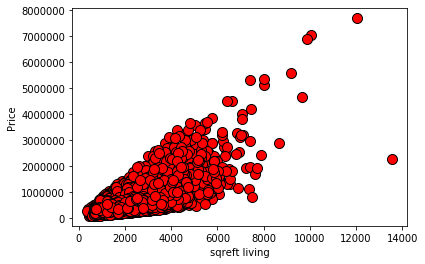

In [5]:
plotData(Xtrain[:, 2], ytrain)

In [6]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    # =========================== YOUR CODE HERE =====================
    for i in range (np.size(X, 1)):
        X_norm[:, i]=(X[:, i]-np.mean(X[:, i]))/np.std(X[:, i])
        mu[i]=np.mean(X[:, i])
        sigma[i]=np.std(X[:, i])
    # ================================================================
    return X_norm, mu, sigma

In [7]:
Xtrain_norm, mu, sigma=featureNormalize(Xtrain)
Xtrain_norm=np.concatenate([np.ones((ytrain.size, 1)), Xtrain_norm], axis=1)
Xtrain_norm2, mu2, sigma2=featureNormalize(Xtrain2)
Xtrain_norm2=np.concatenate([np.ones((ytrain.size, 1)), Xtrain_norm2], axis=1)
Xtrain_norm3, mu3, sigma3=featureNormalize(Xtrain3)
Xtrain_norm3=np.concatenate([np.ones((ytrain.size, 1)), Xtrain_norm3], axis=1)

In [8]:
def computeCost(X, y, theta):
    m = y.shape[0]
    H=np.array(np.dot(theta,X.T))
    J= (np.dot((H-y).T,(H-y))/(2*m))
    return J

In [9]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []
    for i in range(num_iters):
        sumofh0x=np.dot(X,theta)
        theta=theta-((alpha/m)*np.dot(X.T,sumofh0x-y))
        J_history.append(computeCost(X, y, theta))
    return theta, J_history

theta computed from gradient descent: [533247.4934065933 -42842.54617268707 2429.8563232140946
 257586.38131435445 -15929.51013943582 9505.798489466686 48965.83081849805
 55051.5339977366 29995.396821720326]


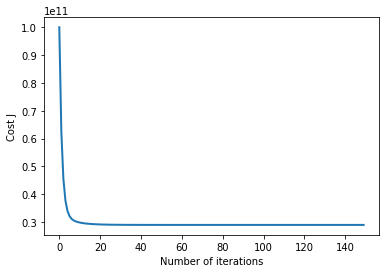

In [11]:
alpha=0.33
num_iters=150
theta=np.zeros(np.size(Xtrain_norm, 1))
theta, J_history = gradientDescent(Xtrain_norm, ytrain, theta, alpha, num_iters)
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')
print('theta computed from gradient descent: {:s}'.format(str(theta)))


theta computed from gradient descent: [533247.4934065933 -26725.030110832784 11613.027023547707
 73024.71630834462 -16247.9693009266 16296.031320272763 45799.50971517722
 53480.319949974146 31801.311698111724 179449.56988993534]


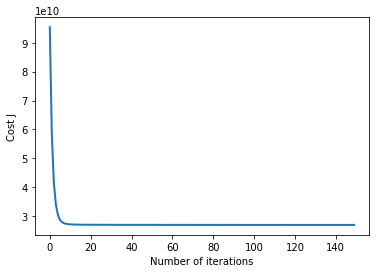

In [12]:
alpha2=0.33
theta2=np.zeros(np.size(Xtrain_norm2, 1))
theta2, J_history2 = gradientDescent(Xtrain_norm2, ytrain, theta2, alpha2, num_iters)
pyplot.plot(np.arange(len(J_history2)), J_history2, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')
print('theta computed from gradient descent: {:s}'.format(str(theta2)))

theta computed from gradient descent: [533247.4934065933 -26688.450559362198 11433.281853220898
 73456.01642539779 -16227.154261850894 16195.81243633551 45751.15884512817
 53466.714920812825 7475.240893657345 179204.76477364966 24867.42390393202]


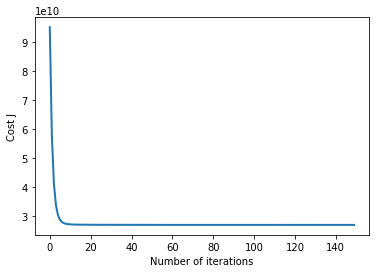

In [13]:
alpha3=0.33
theta3=np.zeros(np.size(Xtrain_norm3, 1))
theta3, J_history3= gradientDescent(Xtrain_norm3, ytrain, theta3, alpha3, num_iters)
pyplot.plot(np.arange(len(J_history3)), J_history3, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')
print('theta computed from gradient descent: {:s}'.format(str(theta3)))

In [14]:
Xcross_norm= (Xcross-mu)/sigma
Xcross_norm=np.concatenate([np.ones((ycross.size, 1)), Xcross_norm], axis=1)
Xcross_norm2= (Xcross2-mu2)/sigma2
Xcross_norm2=np.concatenate([np.ones((ycross.size, 1)), Xcross_norm2], axis=1)
Xcross_norm3= (Xcross3-mu3)/sigma3
Xcross_norm3=np.concatenate([np.ones((ycross.size, 1)), Xcross_norm3], axis=1)

In [15]:
Jcross=computeCost(Xcross_norm, ycross, theta)
Jtrain=computeCost(Xtrain_norm, ytrain, theta)
print (' J cost in training set:', Jtrain)
print (' J cost in cross validation set:', Jcross)
Jcross2=computeCost(Xcross_norm2, ycross, theta2)
Jtrain2=computeCost(Xtrain_norm2, ytrain, theta2)
print(' J cost in cross validation set 2:', Jcross2)
print (' J cost in training set 2:', Jtrain2)
Jcross3=computeCost(Xcross_norm3, ycross, theta3)
Jtrain3=computeCost(Xtrain_norm3, ytrain, theta3)
print(' J cost in cross validation set 3:', Jcross3)
print (' J cost in training set 3:', Jtrain3)

 J cost in training set: 29005105840.1393
 J cost in cross validation set: 29024416582.20737
 J cost in cross validation set 2: 27142430292.32862
 J cost in training set 2: 26949275705.02179
 J cost in cross validation set 3: 27099265617.058792
 J cost in training set 3: 26932963240.5045


In [31]:
Xtest_norm= (Xtest- mu)/sigma
Xtest_norm= np.concatenate([np.ones((ytest.size, 1)), Xtest_norm], axis=1)
Jtest=computeCost(Xtest_norm, ytest, theta)
prediction1=np.dot(Xtest_norm, theta)
print (' J cost in training set:', Jtrain)
print(' J cost in test set:', Jtest)
for i in range(10):
    print(' For the data', Xtest[i, :])
    print(' Predicted price is ', prediction1[i])
    print(' Actual price is ', ytest[i])
print('----------------------')    
Xtest_norm2= (Xtest2- mu2)/sigma2
Xtest_norm2= np.concatenate([np.ones((ytest.size, 1)), Xtest_norm2], axis=1)
Jtest2=computeCost(Xtest_norm2, ytest, theta2)
prediction2=np.dot(Xtest_norm2, theta2)
print (' J cost in training set 2:', Jtrain2)
print(' J cost in test set 2:', Jtest2)
for i in range(10):
    print(' For the data', Xtest2[i, :])
    print(' Predicted price is ', prediction2[i])
    print(' Actual price is ', ytest[i])
print('----------------------')    
Xtest_norm3= (Xtest3- mu3)/sigma3
Xtest_norm3= np.concatenate([np.ones((ytest.size, 1)), Xtest_norm3], axis=1)
Jtest3=computeCost(Xtest_norm3, ytest, theta3)
prediction3=np.dot(Xtest_norm3, theta3)
print (' J cost in training set 3:', Jtrain3)
print(' J cost in test set 3:', Jtest3)
for i in range(10):
    print(' For the data', Xtest3[i, :])
    print(' Predicted price is ', prediction3[i])
    print(' Actual price is ', ytest[i])

 J cost in training set: 29005105840.1393
 J cost in test set: 30445856551.448685
 For the data [3 1.75 1310 9761 1.0 0 0 3]
 Predicted price is  289530.1602587443
 Actual price is  300000.0
 For the data [2 3.25 3000 24004 1.0 0 0 3]
 Predicted price is  816147.9353383093
 Actual price is  780000.0
 For the data [3 2.5 2660 20369 2.0 0 0 3]
 Predicted price is  691139.2849693183
 Actual price is  545000.0
 For the data [3 2.25 2120 9804 2.0 0 0 3]
 Predicted price is  540535.2730849872
 Actual price is  278000.0
 For the data [3 2.25 1200 2845 2.0 0 0 3]
 Predicted price is  281086.9349717305
 Actual price is  342000.0
 For the data [4 1.75 1900 9861 1.0 0 0 4]
 Predicted price is  456815.11041356646
 Actual price is  190000.0
 For the data [2 1.5 1010 948 3.0 0 0 3]
 Predicted price is  289699.1735699368
 Actual price is  387000.0
 For the data [3 2.25 1850 7480 2.0 0 0 3]
 Predicted price is  464500.70820009644
 Actual price is  279950.0
 For the data [6 4.5 4520 40164 2.0 0 0 3]
 P

In [19]:
mfold=datacopy.shape[0]
xfold, yfold=datacopy[:, 3:11], datacopy[:, 2]
xfold, mufold, sigmafold=featureNormalize(xfold)
xfold=np.concatenate([np.ones((yfold.size, 1)), xfold], axis=1)
xf1, xf2, xf3=np.split(xfold, [int (0.33*mfold), int(0.66*mfold)])
yf1, yf2, yf3=np.split(yfold, [int(0.33*mfold), int(0.66*mfold)])

theta computed from gradient descent: [540486.0535129436 -47421.913468522725 839.274412660401 267323.93791911687
 -15597.171689538365 9886.144602074346 54238.94661926752 50525.08800844908
 28464.88115856546]


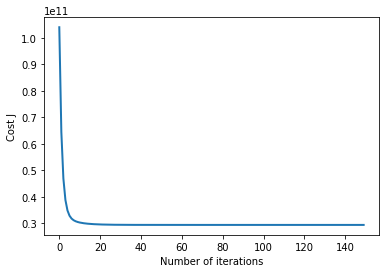

In [22]:
costit=[]
alphaf1=0.33
xftrain1=np.concatenate([xf1, xf2], axis=0)
yftrain1=np.concatenate([yf1, yf2], axis=0)
thetaf1=np.zeros(np.size(xftrain1, 1))
thetaf1, J_historyf1=gradientDescent(xftrain1, yftrain1, thetaf1, alphaf1, num_iters)
pyplot.plot(np.arange(len(J_historyf1)), J_historyf1, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')
print('theta computed from gradient descent: {:s}'.format(str(thetaf1)))
costit.append(computeCost(xf3, yf3, thetaf1))

theta computed from gradient descent: [539592.339683079 -44187.2786182772 9392.102712537684 253004.07646033645
 -11961.528139124946 15378.966017655574 49786.57645076593
 56507.12598857643 32114.70852888364]


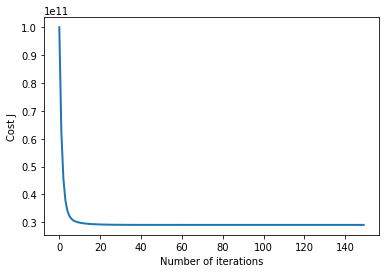

In [24]:
alphaf2=0.33
xftrain2=np.concatenate([xf1, xf3], axis=0)
yftrain2=np.concatenate([yf1, yf3], axis=0)
thetaf2=np.zeros(np.size(xftrain2, 1))
thetaf2, J_historyf2=gradientDescent(xftrain2, yftrain2, thetaf2, alphaf2, num_iters)
pyplot.plot(np.arange(len(J_historyf2)), J_historyf2, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')
print('theta computed from gradient descent: {:s}'.format(str(thetaf2)))
costit.append(computeCost(xf2, yf2, thetaf2))

theta computed from gradient descent: [539714.5888402371 -46694.04804681234 10758.116433040306
 255787.14849027622 -19908.269456643902 11868.314775911304
 38639.626366822326 57750.163610896336 31365.960349424193]


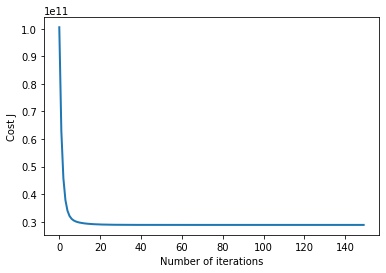

In [26]:
alphaf3=0.33
xftrain3=np.concatenate([xf2, xf3], axis=0)
yftrain3=np.concatenate([yf2, yf3], axis=0)
thetaf3=np.zeros(np.size(xftrain3, 1))
thetaf3, J_historyf3=gradientDescent(xftrain3, yftrain3, thetaf3, alphaf3, num_iters)
pyplot.plot(np.arange(len(J_historyf3)), J_historyf3, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')
print('theta computed from gradient descent: {:s}'.format(str(thetaf3)))
costit.append(computeCost(xf1, yf1, thetaf3))

In [29]:
accuracy=np.mean(costit)
print('Average of the three test cost functions:', accuracy)

Average of the three test cost functions: 29443617165.554077
